In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Data_Train.xlsx to Data_Train.xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test_set.xlsx to Test_set.xlsx


In [ ]:
train_df = pd.read_excel("Data_Train.xlsx")
test_df=pd.read_excel("Test_set.xlsx")

In [ ]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
#Merging the Train and Test Data.
Total_data= train_df.append(test_df,sort=False)


In [ ]:
Total_data.shape

(13354, 11)

In [ ]:
Total_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [ ]:
#Applying the Feature Engineering on the Data

In [ ]:
#Checking all the Data types in our Variables
Total_data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

Feature Engineering


In [ ]:
Total_data['date']= Total_data['Date_of_Journey'].str.split('/').str[0]
Total_data['Month']= Total_data['Date_of_Journey'].str.split('/').str[1]
Total_data['Year']= Total_data['Date_of_Journey'].str.split('/').str[2]

In [ ]:
Total_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [ ]:
Total_data=Total_data.drop('Date_of_Journey', axis=1)

In [ ]:
Total_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [ ]:
#We have to convert the Date Month Year into object into an integer 

In [ ]:
Total_data['date']=Total_data['date'].astype(int)
Total_data['Month']=Total_data['Month'].astype(int)
Total_data['Year']=Total_data['Year'].astype(int)



In [ ]:
Total_data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
date                 int64
Month                int64
Year                 int64
dtype: object

In [ ]:
#We have to Get the Arrival time not the Date in the arrival time in the data.
Total_data['Arrival_Time']=Total_data['Arrival_Time'].str.split(" ").str[0]


In [ ]:
#To check the the null values in the Total stops
Total_data[Total_data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [ ]:
 np.where(Total_data['Total_Stops']== "non-stop")

(array([    0,     5,    11, ..., 13345, 13348, 13350]),)

In [ ]:
#Now we have to fill the Missing Values in the Total stops coloums
Total_data['Total_Stops']=Total_data['Total_Stops'].fillna('1 stop')

In [ ]:
Total_data[Total_data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year


In [ ]:
#Now we have to convert the non stop into the 0 stop
Total_data['Total_Stops'] =  Total_data['Total_Stops'].replace(['non-stop'],'0 stop')

In [ ]:
Total_data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [ ]:
#Now Strip the First value from the Total_stops
Total_data['Total_Stops']=Total_data['Total_Stops'].str.split(" ").str[0]

In [ ]:
Total_data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
date                 int64
Month                int64
Year                 int64
dtype: object

In [ ]:
#Convert the Data Type from object64 to int
Total_data['Total_Stops']=Total_data['Total_Stops'].astype(int)

In [ ]:
Total_data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops          int64
Additional_Info     object
Price              float64
date                 int64
Month                int64
Year                 int64
dtype: object

In [ ]:
Total_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [ ]:
Total_data['Arrival_hour']=Total_data['Arrival_Time'].str.split(":").str[0]
Total_data['Arrival_minutes']=Total_data['Arrival_Time'].str.split(":").str[1]

In [ ]:
Total_data=Total_data.drop('Arrival_Time', axis=1)

In [ ]:
Total_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,0,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1,No info,13302.0,1,3,2019,21,35


In [ ]:
Total_data.dtypes


Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Duration            object
Total_Stops          int64
Additional_Info     object
Price              float64
date                 int64
Month                int64
Year                 int64
Arrival_hour        object
Arrival_minutes     object
dtype: object

In [ ]:
Total_data['Arrival_hour']=Total_data['Arrival_hour'].astype(int)
Total_data['Arrival_minutes']=Total_data['Arrival_minutes'].astype(int)


In [ ]:
Total_data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Duration            object
Total_Stops          int64
Additional_Info     object
Price              float64
date                 int64
Month                int64
Year                 int64
Arrival_hour         int64
Arrival_minutes      int64
dtype: object

In [ ]:
Total_data['Dep_hour']=Total_data['Dep_Time'].str.split(":").str[0]
Total_data['Dep_Minutes']=Total_data['Dep_Time'].str.split(":").str[1]

In [ ]:
Total_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2,No info,13882.0,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
Total_data=Total_data.drop('Dep_Time', axis=1)

In [ ]:
Total_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
Total_data['Dep_hour']=Total_data['Dep_hour'].astype(int)
Total_data['Dep_Minutes']=Total_data['Dep_Minutes'].astype(int)

In [ ]:
Total_data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops          int64
Additional_Info     object
Price              float64
date                 int64
Month                int64
Year                 int64
Arrival_hour         int64
Arrival_minutes      int64
Dep_hour             int64
Dep_Minutes          int64
dtype: object

In [ ]:
#Working on the Route .
Total_data['Route_1']=Total_data['Route'].str.split('→ ').str[0]
Total_data['Route_2']=Total_data['Route'].str.split('→ ').str[1]
Total_data['Route_3']=Total_data['Route'].str.split('→ ').str[2]
Total_data['Route_4']=Total_data['Route'].str.split('→ ').str[3]
Total_data['Route_5']=Total_data['Route'].str.split('→ ').str[4]

In [ ]:
Total_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [ ]:
#Checking for the Null Values in the Price.
Total_data['Price'].fillna(Total_data['Price'].mean(),inplace=True)

In [ ]:
#Filling the Null values in the Routes tables.
Total_data['Route_1'].fillna("None",inplace=True)
Total_data['Route_2'].fillna("None",inplace=True)
Total_data['Route_3'].fillna("None",inplace=True)
Total_data['Route_4'].fillna("None",inplace=True)
Total_data['Route_5'].fillna("None",inplace=True)

In [ ]:
Total_data=Total_data.drop('Route',axis=1)

In [ ]:
Total_data=Total_data.drop('Duration',axis=1)

In [ ]:
Total_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None


In [ ]:
#Now we have to apply the Label Encoder.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Total_data['Airline']=encoder.fit_transform(Total_data['Airline'])
Total_data['Source']=encoder.fit_transform(Total_data['Source'])
Total_data['Destination']=encoder.fit_transform(Total_data['Destination'])
Total_data['Additional_Info']=encoder.fit_transform(Total_data['Additional_Info'])
Total_data['Route_1']=encoder.fit_transform(Total_data['Route_1'])
Total_data['Route_2']=encoder.fit_transform(Total_data['Route_2'])
Total_data['Route_3']=encoder.fit_transform(Total_data['Route_3'])
Total_data['Route_4']=encoder.fit_transform(Total_data['Route_4'])
Total_data['Route_5']=encoder.fit_transform(Total_data['Route_5'])

In [ ]:
Total_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,0,13,24,12,4
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,2,25,1,3,4
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,3,32,4,5,4
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,2,34,3,12,4
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,0,34,8,12,4


#Feature Selection Model

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
df_train=Total_data[0:10683]
df_test=Total_data[10683:]

In [ ]:
X=df_train.drop(['Price'], axis=1)


In [ ]:
Y=df_train['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)


In [ ]:
model=SelectFromModel(Lasso(alpha=0.05,random_state=0))   #very useful in the Feauture Selection Both Select Model And Lasso

In [ ]:
model.fit(X_train,Y_train)


SelectFromModel(estimator=Lasso(alpha=0.05, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
#This Code shows which Feature is important 
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
#Conclusion year feature is not important as it same year all together
Seletected_Features=X_train.columns[(model.get_support())]
Seletected_Features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'date', 'Month', 'Arrival_hour', 'Arrival_minutes', 'Dep_hour',
       'Dep_Minutes', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [ ]:
X_train=X_train.drop('Year',axis=1)

In [ ]:
#We have to drop the Year data from both X_train and X_test

In [ ]:
X_test=X_test.drop('Year',axis=1)


#Model Selection

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Hyperparameter Tuning is applied in the Data
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
#Creating the Dictionary for the random Grid of the Variables

random_grid={
            'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf
}

In [ ]:
#Applying the Model selection after the hyperparameter Tuning

from sklearn.ensemble import RandomForestRegressor
RandomForest= RandomForestRegressor()


In [ ]:
rf_random=RandomizedSearchCV(estimator = RandomForest, param_distributions = random_grid,scoring='neg_mean_squared_error',
                             n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   2.9s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 16.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
y_pred=rf_random.predict(X_test)

In [ ]:
y_pred

array([ 6226.41380952,  3902.11783333, 11925.59340806, ...,
       11617.27525018, 14288.83605952,  7741.71004762])

In [ ]:
Y_test

9693      6171.0
9825      3873.0
7702     10991.0
1437     16757.0
6828      6316.0
          ...   
2294      7318.0
7085      4462.0
10331    11789.0
872      13941.0
6935      8040.0
Name: Price, Length: 3205, dtype: float64

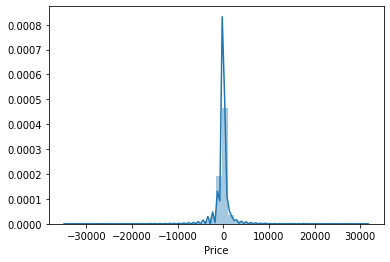

In [ ]:
sns.distplot(Y_test-y_pred)

#Linear Regression

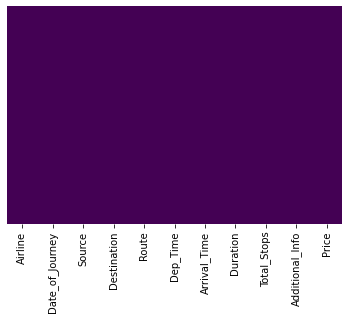

In [ ]:
#First we are going to check the null values through a visualization.
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#checking for the Corelation in the Data.


In [ ]:
corr_matrix = Total_data.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price              1.000000
Total_Stops        0.540592
Route_1            0.162966
Arrival_hour       0.021585
Source             0.014292
Dep_hour           0.006112
Dep_Minutes       -0.021831
Airline           -0.035170
Route_5           -0.046848
Additional_Info   -0.059337
Destination       -0.063664
Arrival_minutes   -0.076809
Route_2           -0.077656
Month             -0.092606
date              -0.138160
Route_4           -0.281177
Route_3           -0.518751
Year                    NaN
Name: Price, dtype: float64

In [ ]:
#Plotting different Graphs to check the corelation.
from pandas.plotting import scatter_matrix
Features=['Price','Total_Stops','date','Airline']
scatter_matrix(Total_data[Features],figsize=(12,8), alpha=0.8)


NameError: ignored

Feauture Importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,Y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
model.feature_importances_

array([0.14060669, 0.01373645, 0.02485577, 0.2147636 , 0.0660508 ,
       0.12597333, 0.04719338, 0.02582366, 0.01866767, 0.02866411,
       0.02486251, 0.01087924, 0.06101747, 0.17184298, 0.02477592,
       0.00028642])

In [ ]:
#ploting the Grap for the Features Importances.

In [ ]:
# feat_importances = pd.Series(model.feature_importances_, index=Total_data.columns)
# feat_importances.nlargest(5).plot(kind='barh')
# plt.show()


In [ ]:
#Aplying the Linear Regression funda

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Coefecient of the Determination of the R2 ---> on the Train Set---->{}".format(model.score(X_train,Y_train)))

Coefecient of the Determination of the R2 ---> on the Train Set---->0.49149252514828545


In [ ]:
#Applying the Cross Validation on the Data Sets.

from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X_train,Y_train,cv=10)

In [ ]:
score.mean()

0.4925130150612745

In [ ]:
coeff=pd.DataFrame(model.coef_,X_train.columns,columns=['coefficient'])
coeff


,coefficient
Airline,150.913191
Source,-136.457501
Destination,369.505179
Total_Stops,3713.721393
Additional_Info,155.122466
date,-76.741349
Month,-363.251513
Arrival_hour,-10.550131
Arrival_minutes,-3.297534
Dep_hour,26.371921


In [ ]:
model.intercept_

7624.004709611349

In [ ]:
X_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,date,Month,Arrival_hour,Arrival_minutes,Dep_hour,Dep_Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
9693,3,2,1,1,8,27,3,16,10,4,55,3,20,6,12,4
9825,8,3,0,0,8,27,5,0,40,22,20,2,5,24,12,4
7702,1,3,0,2,8,6,6,20,25,5,50,2,25,9,3,4
1437,4,0,5,1,8,6,3,14,25,9,45,0,33,8,12,4
6828,3,2,1,1,8,15,6,1,30,16,0,3,7,6,12,4


In [ ]:
#Prediction through Linear Regression

In [ ]:
y_pred=model.predict(X_test)

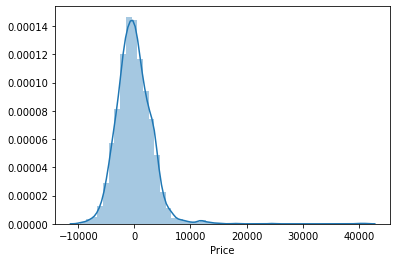

In [ ]:
#Checking the Predicted Values And Y_test Values using Distplot. 

sns.distplot(Y_test-y_pred) #We are getting proper bell curve Graph

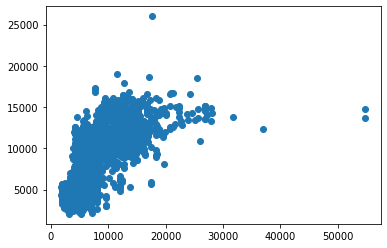

In [ ]:
#check the Prediction in the Scatter Matrix form also.

plt.scatter(Y_test,y_pred)

Evaluation Metric in The Regression

In [ ]:
#MAE------>Mean Absolute Error = 1/n E |y1-y2|
#MSE------>Mean Squared Error = 1/n E |y1-y2|^2
#RMSE----->Root Mean Squared Error = 1/n E root(|y1-y2|)

In [ ]:
from sklearn import metrics

print("Mean Absolute Error is calculated:",metrics.mean_absolute_error(Y_test,y_pred))
print("Mean Absolute Error is calculated:",metrics.mean_squared_error(Y_test,y_pred))
print("Mean Absolute Error is calculated:",np.sqrt(metrics.mean_absolute_error(Y_test,y_pred)))

Mean Absolute Error is calculated: 2322.784327894999
Mean Absolute Error is calculated: 10076206.678728113
Mean Absolute Error is calculated: 48.1952728791424


#Ridge And Lasso Regression

In [ ]:
#Formula 1/n E y-y^ + Lambda * slope^2 for Ridge
#Formula 1/n E y-y^ + Lamda * |slope| for Lasso
#We are reducing the Stip ness of the Slop. Slop having higer values is getting reduced . Otherwise it will  lead to 
#overfitting. This is the way to reduce the Overfitting.

In [ ]:
#Lasso helps in the Feature Selection

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model=LinearRegression()
mse=cross_val_score(model,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)



-11081592.150922121


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-11081237.475335058


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
Lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
Lasso_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
Lasso_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(Lasso_regressor.best_params_)
print(Lasso_regressor.best_score_)

{'alpha': 5}
-11081237.475335058


In [ ]:
y_pred = Lasso_regressor.predict(X_test)

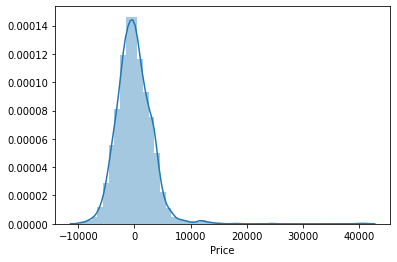

In [ ]:
sns.distplot(Y_test-y_pred)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree=DecisionTreeRegressor(criterion="mse")

In [ ]:
dtree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, Y_train)))

Coefficient of determination R^2 <-- on train set: 0.9959521141166388


In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, Y_test)))

Coefficient of determination R^2 <-- on test set: 0.8104420870609803


In [ ]:
score=cross_val_score(dtree,X_train,Y_train,cv=5)

In [ ]:
score.mean()

0.8140748211485256

In [ ]:
prediction=dtree.predict(X_test)

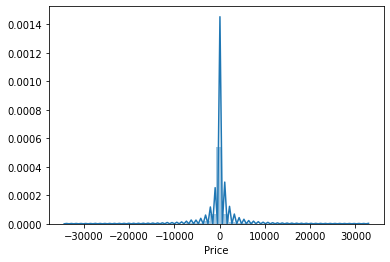

In [ ]:
sns.distplot(Y_test-prediction)

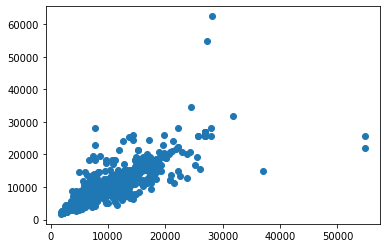

In [ ]:

plt.scatter(Y_test,prediction)

#Hyper Parameter tuning 

In [ ]:
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [ ]:
#Setting the Timer for model Evaluation
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,Y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1578 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 4138 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 7722 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 12330 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 17962 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 24618 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 32298 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 41002 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 50730 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 61482 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 73258 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 86058 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 99882 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 10240


 Time taken: 0 hours 8 minutes and 1.14 seconds.
